# Analysis on Iris flower data set 
#Three flower species 
#Data set https://en.wikipedia.org/wiki/Iris_flower_data_set
#Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
#Objective - Classify a new flower as belonging to one of the 3 classes given the 4 features.



In [3]:
import numpy as np   #importing numpy for array
import pandas as pd  #importing pandas for data reading and operation on data frame
import matplotlib.pyplot as plt  #this is for making it visual like MATLAB
import seaborn as sns   # it is also for visulization.


iris = pd.read_csv("iris.csv")  #reading the data file using panda(pd).
print(iris.head())  # As in the output we can see that there are 4 features.
print(iris.shape)   # we have 150 rows and 5 columns 
# now we need to know whether this data set is balanced or not 
# It means how many rows are of all three species
print(iris['species'].value_counts())  # So it perfectly balanced

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)
virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64


In [4]:
#1d scatter plot
# first we try to find the pattern by just seeing only one features 
iris_setosa = iris.loc[iris["species"] == "setosa"];  # seleceting the rows which have species as setosa
iris_virginica = iris.loc[iris["species"] == "virginica"]; #selecting the rows which have species as virginica
iris_versicolor = iris.loc[iris["species"] == "versicolor"]; #selecting the rows which have species as versicolor
print(iris_setosa.head()) #verify it

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


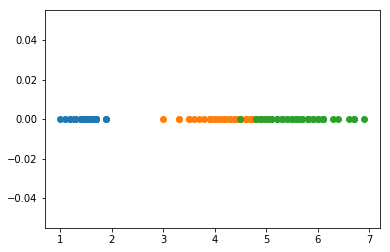

In [5]:

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']),'o')  # what we are doing we are making one dimesional graph using each type of species 
# here zero_like is for creating the same type of iris_setosa, but there will be zero so as there is zero in y axis.
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')


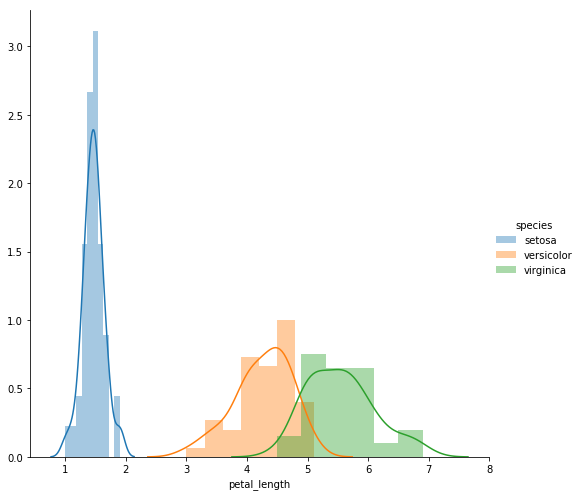

In [6]:
# we use probability density function to visulaize 
#sns.displot for destribution plot
sns.FacetGrid(iris, hue="species", height=7) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();


c:\program files (x86)\python37-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


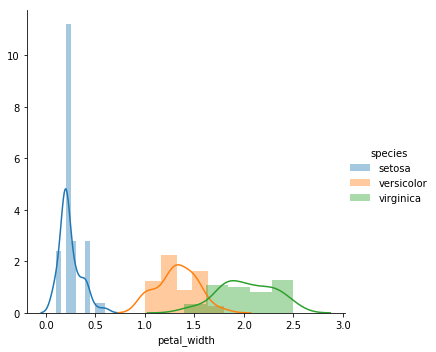

In [7]:
# we can do for petal width also 
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

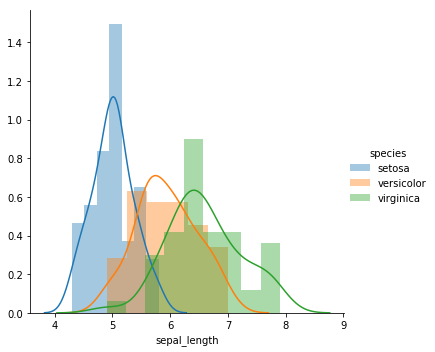

In [8]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

# it is more complex to visulaize 

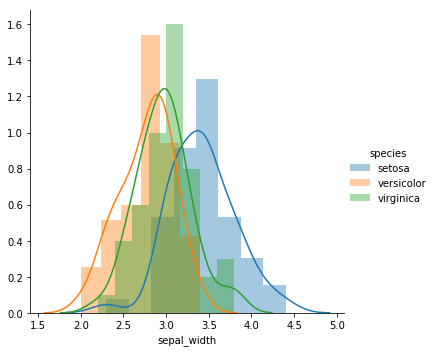

In [9]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();
# it is far more complex also 

In [10]:
# now we will use cummutative distributive function 
# this is for what percentage 
# this is basically the area upto that point in PDF 


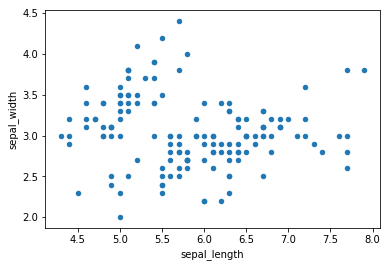

In [11]:
#2d scatter plot of sepal length and sepal width 
# iris is pointing to dataframe
# using matplot 

iris.plot(kind="scatter", x = 'sepal_length', y = 'sepal_width')
plt.show()  # it is just the plotting of sepal_width to sepal_length


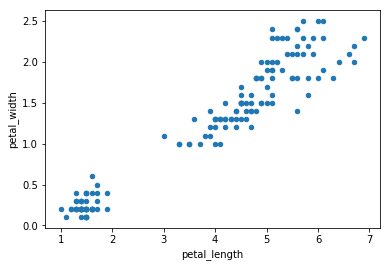

In [12]:
#lets try with petal_length to Petal_width

iris.plot(kind='scatter',x='petal_length', y = 'petal_width')
plt.show()  # we kind see some patter, but what if we could differentiate the point of each type of species.

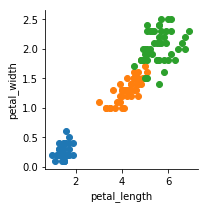

In [13]:
#So here we are doing 2d scatter plot with color coding, so that we can visualize better. 
# we are doing this with the help of seaborn (sns)
sns.FacetGrid(iris, hue= "species").map(plt.scatter,"petal_length", "petal_width")
plt.show()

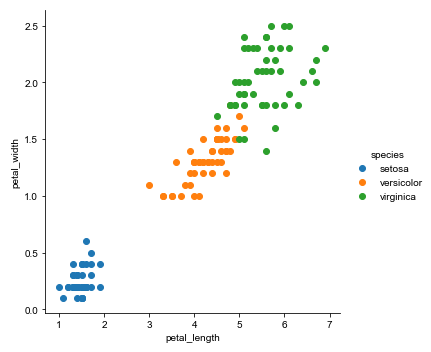

In [14]:
#for better visulization we can add grid and legends
sns.FacetGrid(iris, hue= "species", size=5).map(plt.scatter,"petal_length", "petal_width").add_legend()
sns.set_style("whitegrid");
plt.show()

#now we can clearly see classify setosa (blue color)
# here we are only comparing two variable at a time, what if we could compare more than two variable, but that would be tough for us to visulaize the 3d or 4d or any higher dimension

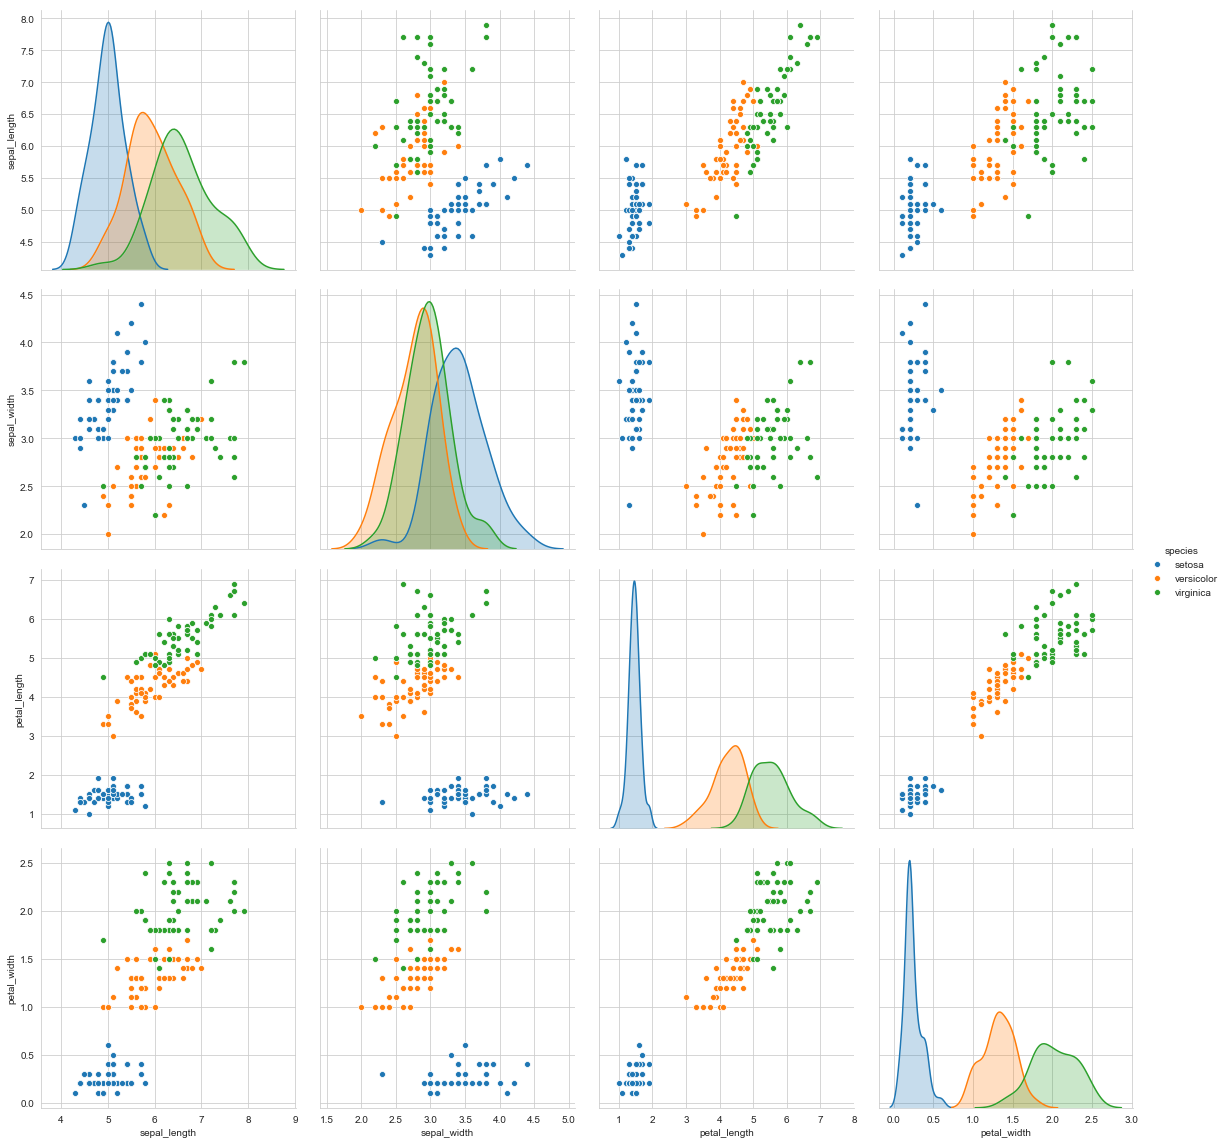

In [15]:
# pair plot
# we are comparing every possible of pairs of features in 2D.
plt.close()
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=4)
plt.show()
# So by looking all the combination we can say that petal_length and petal_width are most useful to identify 

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


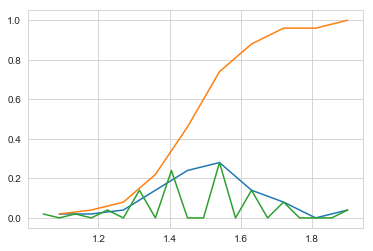

In [16]:
# CDF - this is used to visulalize what percentage of that less than that.
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))  # findind the probability at each point
print(pdf);  #printing probability 
print(bin_edges); #printing length
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.show();


In [17]:
#mean, #variance #Std - deviation 
#Mean, Variance, Std-deviation,  
import numpy as np   
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50))); #one outlier can corrupt the whole data 
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))


Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


In [18]:
#Median
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
# as we can see in output that outlier doesn't affect the median
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35


In [19]:
#Quantiles 
#25th, 50th(median in sorted), 75th, 100th percentile are called quantiles
print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25))) #so we are asking to give precentile from 0 to 100 with the gap of 25 i.e quantile 
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))



Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


In [20]:
#90th percentile 
print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))


90th Percentiles:
1.7
6.3100000000000005
4.8


In [25]:
#median absolute deviation
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


In [ ]:
# interquantile range = 75th precentile  - 25th percentile 
# in what range my 50% values lies

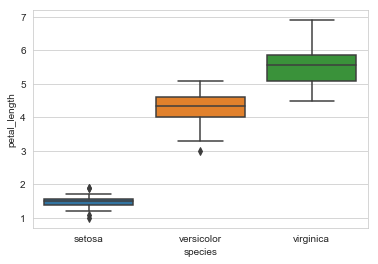

In [23]:
# In histogram, we can't see where is my 25th precetile or 50th or 75th.
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

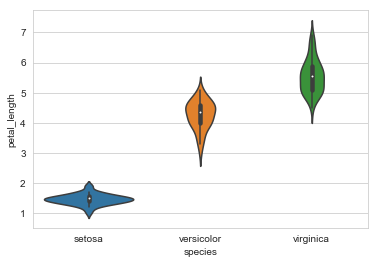

In [24]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

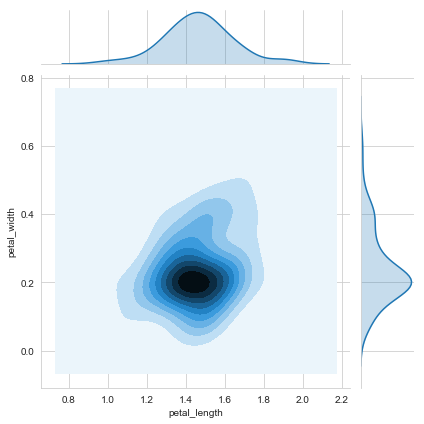

In [26]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();